### Create a function similar to run_foraging, but instead take in path variables. 

In [1]:
'''Created run_foraging_function.py to go over loop of average and different alphas'''

'Created run_foraging_function.py to go over loop of average and different alphas'

## NLL, dimensions, alphas, average

In [3]:
import numpy as np 
import pandas as pd 
from statistics import mean 

In [106]:
''' group_dict for a dictionary with participant id as key and grouping as values'''


participant_demographic = pd.read_csv("../data/raw_data/latest_demo.csv")

ID = participant_demographic['ID'].tolist()
Group = participant_demographic["Group"].tolist()
group_dict = dict(zip(ID, Group))

print(group_dict)


{211: 'CI', 234: 'CI', 300: 'CI', 308: 'CI', 310: 'CI', 312: 'CI', 320: 'CI', 329: 'CI', 335: 'CI', 338: 'CI', 344: 'CI', 390: 'CI', 450: 'CI', 452: 'CI', 483: 'CI', 520: 'CI', 544: 'CI', 556: 'CI', 558: 'CI', 563: 'CI', 570: 'CI', 587: 'CI', 672: 'NH', 673: 'NH', 674: 'NH', 681: 'NH', 698: 'NH', 702: 'NH', 707: 'NH', 711: 'NH', 715: 'NH', 720: 'NH', 722: 'NH', 724: 'NH', 726: 'NH', 730: 'NH', 744: 'NH', 753: 'NH', 754: 'NH', 759: 'NH', 764: 'NH', 767: 'NH', 781: 'CI', 721: 'NH', 657: 'NH', 666: 'NH', 671: 'NH', 686: 'NH', 691: 'NH', 693: 'NH', 697: 'NH', 663: 'NH', 678: 'NH', 498: 'CI', 539: 'CI', 340: 'CI', 436: 'CI', 401: 'CI', 315: 'CI', 159: 'CI'}


In [107]:
'''adding group column into the csv file'''
dimensions = ['50', '100', '200', '300']
type = [
    'alpha_0_s2v', 
    'alpha_0_w2v', 
    'alpha_0.1_s2v', 
    'alpha_0.1_w2v', 
    'alpha_0.2_s2v', 
    'alpha_0.2_w2v', 
    'alpha_0.3_s2v', 
    'alpha_0.3_w2v', 
    'alpha_0.4_s2v', 
    'alpha_0.4_w2v', 
    'alpha_0.5_s2v', 
    'alpha_0.5_w2v', 
    'alpha_0.6_s2v', 
    'alpha_0.6_w2v',
    'alpha_0.7_s2v', 
    'alpha_0.7_w2v', 
    'alpha_0.8_s2v', 
    'alpha_0.8_w2v', 
    'alpha_0.9_s2v', 
    'alpha_0.9_w2v', 
    'alpha_1.0_s2v', 
    'alpha_1.0_w2v',
    'average',
    'only_s2v', 
    'only_w2v'
]

for dim in dimensions: 
    for t in type: 
        
# /Users/mkang2/Library/CloudStorage/OneDrive-BowdoinCollege/Desktop/cochlear-project/forager/output/50_dim_results/alpha_0_s2v_results/model_results.csv
        
        
        path = '../forager/output/' + dim + '_dim_results/' + t + '_results' +'/model_results.csv'
        forager_ind_stats = pd.read_csv(path)
        #get the list of subjects and create a new list for their groupings 
        #word2vec first 
        forager_subjects = forager_ind_stats["Subject"].tolist()
        forager_groupings = [] 

        for index, row in forager_ind_stats.iterrows(): 
            forager_groupings += [group_dict[int(row['Subject'][4:])]]

        forager_ind_stats['Group'] = forager_groupings

        forager_ind_stats.to_csv(path, index = False)


### Model_results dataframe with alpha, average, and dimensions 

In [108]:
#model_results dataframe => dimension_model_results 
dimension_model_results = pd.DataFrame(columns=["dimension", "type", "model", "group", "sum_NLL", "mean_beta_semantic", "mean_beta_freq", "mean_beta_phon"])

dimensions = ['50', '100', '200', '300']
type = [
    'alpha_0_s2v', 
    'alpha_0_w2v', 
    'alpha_0.1_s2v', 
    'alpha_0.1_w2v', 
    'alpha_0.2_s2v', 
    'alpha_0.2_w2v', 
    'alpha_0.3_s2v', 
    'alpha_0.3_w2v', 
    'alpha_0.4_s2v', 
    'alpha_0.4_w2v', 
    'alpha_0.5_s2v', 
    'alpha_0.5_w2v', 
    'alpha_0.6_s2v', 
    'alpha_0.6_w2v',
    'alpha_0.7_s2v', 
    'alpha_0.7_w2v', 
    'alpha_0.8_s2v', 
    'alpha_0.8_w2v', 
    'alpha_0.9_s2v', 
    'alpha_0.9_w2v', 
    'alpha_1.0_s2v', 
    'alpha_1.0_w2v',
    'average',
    'only_s2v', 
    'only_w2v'
]

model = ["Dynamic/Simdrop"]
model_label = ["forage_dynamic_simdrop"]
groups = ["NH", "CI"]
stats = ["sum_NLL", "mean_beta_semantic", "mean_beta_freq", "mean_beta_phon"]
stats_label = ["Negative_Log_Likelihood_Optimized", "Beta_Semantic", "Beta_Frequency", "Beta_Phonological"]

rows= [] 

for dim in dimensions: 
    for t in type: 
        path = '../forager/output/' + dim + '_dim_results/' + t + '_results' +'/model_results.csv'

        data = pd.read_csv(path)
        data_groups = data.groupby(["Group", "Model"])

        for group in groups: 
            row = [dim, t, model[0], group]
            test_data = data_groups.get_group((group, model_label[0]))

            j = 0 
            while j < len(stats): 
                if j == 0:
                    row += [test_data[stats_label[j]].sum()]
                elif j == len(stats) - 1: 
                    row += ["n/a"]
                else: 
                    row += [test_data[stats_label[j]].mean()]
                j += 1 
            rows += [row]


print(rows[0])
for line in rows: 
    dimension_model_results.loc[len(dimension_model_results)] = line 
dimension_model_results
dimension_model_results.to_csv("../results/model_results.csv", index = False)

['50', 'alpha_0_s2v', 'Dynamic/Simdrop', 'NH', 3488.038620954074, 3.919814590733218, 8.013672955662653, 'n/a']


###  Q3 Plot - NLL, dimensions, alphas, average, w2v, s2v


In [109]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 

In [110]:
model_data = pd.read_csv("../results/model_results.csv")
model_data

,dimension,type,model,group,sum_NLL,mean_beta_semantic,mean_beta_freq,mean_beta_phon
0,50,alpha_0_s2v,Dynamic/Simdrop,NH,3488.038621,3.919815,8.013673,NaN
1,50,alpha_0_s2v,Dynamic/Simdrop,CI,2927.475000,4.581609,8.690506,NaN
2,50,alpha_0_w2v,Dynamic/Simdrop,NH,3495.317287,3.838401,8.139141,NaN
3,50,alpha_0_w2v,Dynamic/Simdrop,CI,2921.399968,4.555132,8.813831,NaN
4,50,alpha_0.1_s2v,Dynamic/Simdrop,NH,3486.613874,3.935488,8.015492,NaN
...,...,...,...,...,...,...,...,...
195,300,average,Dynamic/Simdrop,CI,2980.399314,2.481947,9.044614,NaN
196,300,only_s2v,Dynamic/Simdrop,NH,3526.465137,2.300483,8.692809,NaN
197,300,only_s2v,Dynamic/Simdrop,CI,2991.689686,2.390974,9.459983,NaN
198,300,only_w2v,Dynamic/Simdrop,NH,3520.718179,2.285279,8.120455,NaN


In [111]:
model_groups = model_data.groupby(['type', 'group'])

dimensions = ["50", '100', '200', '300']
type = [
    "alpha_0_s2v", 
    'alpha_0_w2v', 
    'alpha_0.1_s2v', 
    'alpha_0.1_w2v', 
    'alpha_0.2_s2v', 
    'alpha_0.2_w2v', 
    'alpha_0.3_s2v', 
    'alpha_0.3_w2v', 
    'alpha_0.4_s2v', 
    'alpha_0.4_w2v', 
    'alpha_0.5_s2v', 
    'alpha_0.5_w2v', 
    'alpha_0.6_s2v', 
    'alpha_0.6_w2v',
    'alpha_0.7_s2v', 
    'alpha_0.7_w2v', 
    'alpha_0.8_s2v', 
    'alpha_0.8_w2v', 
    'alpha_0.9_s2v', 
    'alpha_0.9_w2v', 
    'alpha_1.0_s2v', 
    'alpha_1.0_w2v',
    'average',
    'only_s2v', 
    'only_w2v'
]

colors = ['b', 'r', 'g', 'y', 'p']


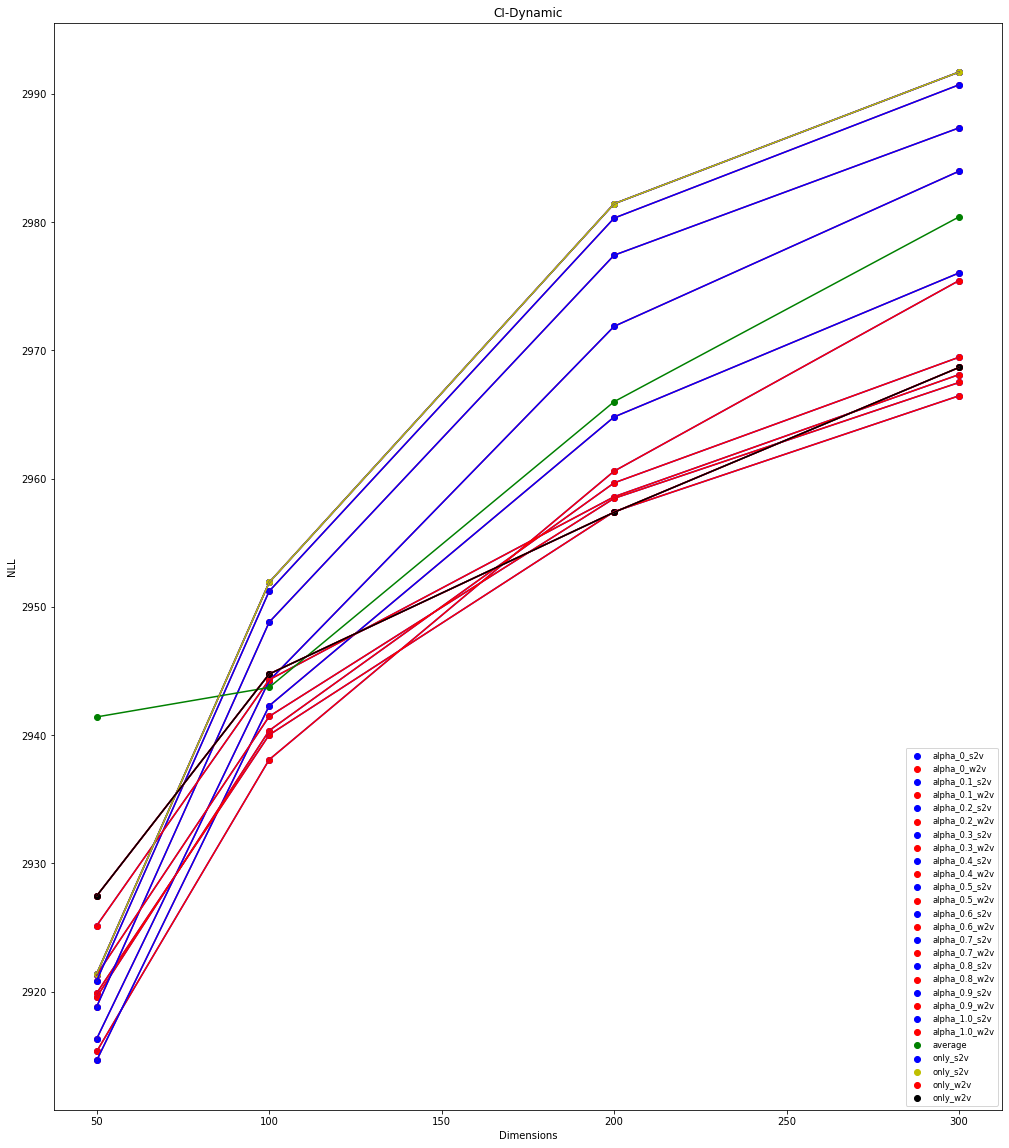

In [112]:
''' Creating CI first'''
plt.figure(figsize=(17, 20))


for dim in dimensions: 
    for t in type: 
        t_group = model_groups.get_group((t, "CI"))
        
        if 'alpha' and "s2v" in t: 
            plt.scatter(t_group['dimension'], t_group['sum_NLL'], c='b', label = t)
            plt.plot(t_group['dimension'], t_group['sum_NLL'], c='b')  
        if 'alpha' and "w2v" in t: 
            plt.scatter(t_group['dimension'], t_group['sum_NLL'], c='r', label = t)
            plt.plot(t_group['dimension'], t_group['sum_NLL'], c='r')  
        if t == "average": 
            plt.scatter(t_group['dimension'], t_group['sum_NLL'], c='g', label = t)
            plt.plot(t_group['dimension'], t_group['sum_NLL'], c='g')  
        if t == "only_s2v": 
            plt.scatter(t_group['dimension'], t_group['sum_NLL'], c='y', label = t)
            plt.plot(t_group['dimension'], t_group['sum_NLL'], c='y')  
        if t == "only_w2v": 
            plt.scatter(t_group['dimension'], t_group['sum_NLL'], c='black', label = t)
            plt.plot(t_group['dimension'], t_group['sum_NLL'], c='black')  
    break
plt.title("CI-Dynamic")
plt.xlabel("Dimensions")
plt.ylabel("NLL")
plt.legend(loc="lower right", fontsize= 'small')

plt.savefig("../plots/Q3/CI-Dynamic")
plt.show()
              


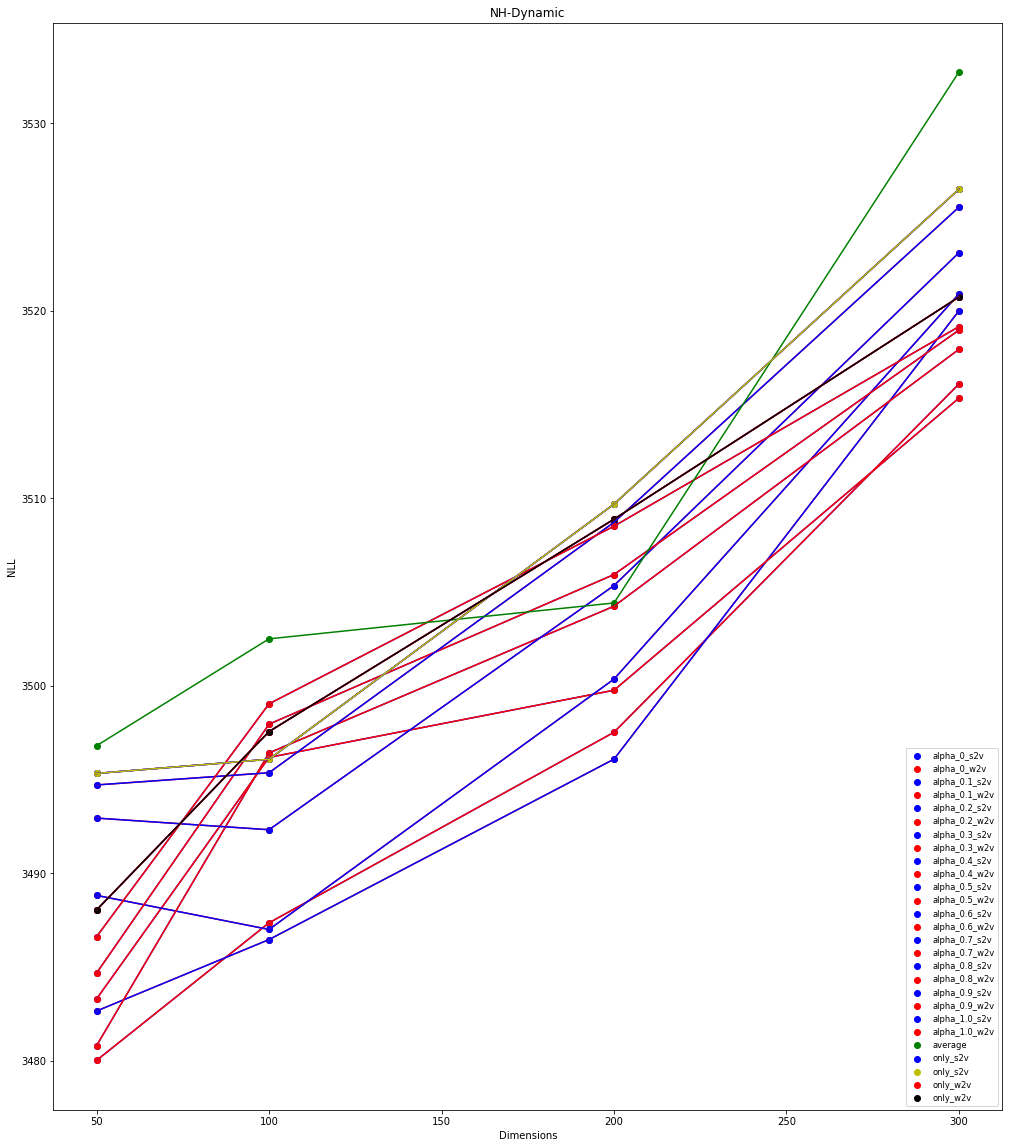

In [97]:
''' Creating NH'''
plt.figure(figsize=(17, 20))


for dim in dimensions: 
    for t in type: 
        t_group = model_groups.get_group((t, "NH"))
        if 'alpha' and "s2v" in t: 
            plt.scatter(t_group['dimension'], t_group['sum_NLL'], c='b', label = t)
            plt.plot(t_group['dimension'], t_group['sum_NLL'], c='b')  
        if 'alpha' and "w2v" in t: 
            plt.scatter(t_group['dimension'], t_group['sum_NLL'], c='r', label = t)
            plt.plot(t_group['dimension'], t_group['sum_NLL'], c='r')  
        if t == "average": 
            plt.scatter(t_group['dimension'], t_group['sum_NLL'], c='g', label = t)
            plt.plot(t_group['dimension'], t_group['sum_NLL'], c='g')  
        if t == "only_s2v": 
            plt.scatter(t_group['dimension'], t_group['sum_NLL'], c='y', label = t)
            plt.plot(t_group['dimension'], t_group['sum_NLL'], c='y')  
        if t == "only_w2v": 
            plt.scatter(t_group['dimension'], t_group['sum_NLL'], c='black', label = t)
            plt.plot(t_group['dimension'], t_group['sum_NLL'], c='black')  
    break
plt.title("NH-Dynamic")
plt.xlabel("Dimensions")
plt.ylabel("NLL")
plt.legend(loc="lower right", fontsize= 'small')

plt.savefig("../plots/Q3/NH-Dynamic")
plt.show()

### Creating Q4 plot - semantic similarity vs. phonological similarity 


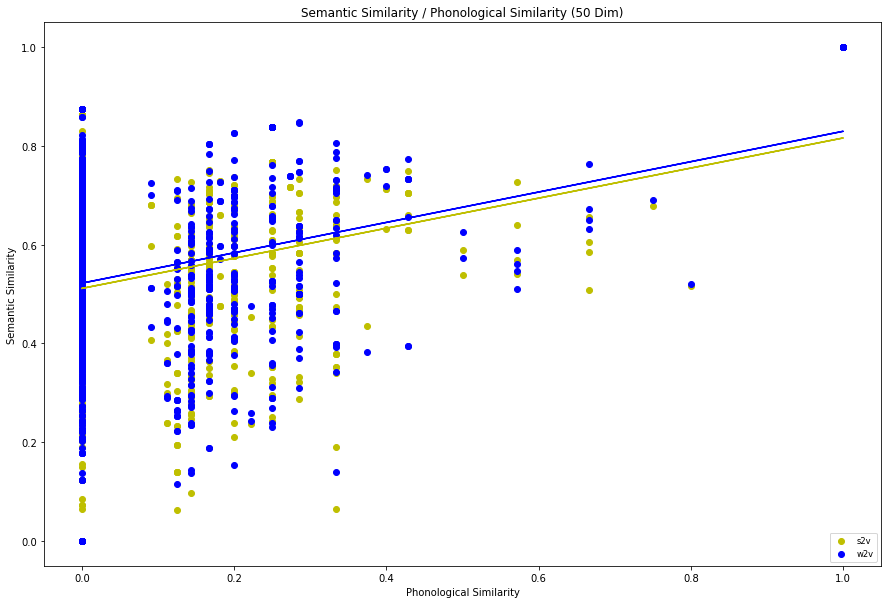

In [102]:
'''50 dimensions'''

s2v = '../forager/output/50_dim_results/only_s2v_results/lexical_results.csv'
w2v = '../forager/output/50_dim_results/only_w2v_results/lexical_results.csv'



s2v = pd.read_csv(s2v)
s2v_semantic = np.array(s2v['Semantic_Similarity'].tolist())
s2v_phonological = np.array(s2v['Phonological_Similarity'].tolist())
s2v_slope, s2v_intercept = np.polyfit(s2v_phonological, s2v_semantic, 1) 
s2v_line = s2v_slope * s2v_phonological + s2v_intercept

w2v = pd.read_csv(w2v)
w2v_semantic = np.array(w2v['Semantic_Similarity'].tolist())
w2v_phonological = np.array(w2v['Phonological_Similarity'].tolist())
w2v_slope, w2v_intercept = np.polyfit(w2v_phonological, w2v_semantic, 1) 
w2v_line = w2v_slope * w2v_phonological + w2v_intercept


plt.figure(figsize=(15, 10))
plt.title("Semantic Similarity / Phonological Similarity (50 Dim)")
plt.scatter(s2v_phonological, s2v_semantic, c='y', label = "s2v")
plt.plot(s2v_phonological, s2v_line, c='y')

plt.scatter(w2v_phonological, w2v_semantic, c='b', label = "w2v")
plt.plot(w2v_phonological, w2v_line, c='b')



plt.legend(loc='lower right', fontsize= 'small')

plt.xlabel('Phonological Similarity')
plt.ylabel('Semantic Similarity')
plt.savefig("../plots/Q4/Semantic-Phon-50")
plt.show()

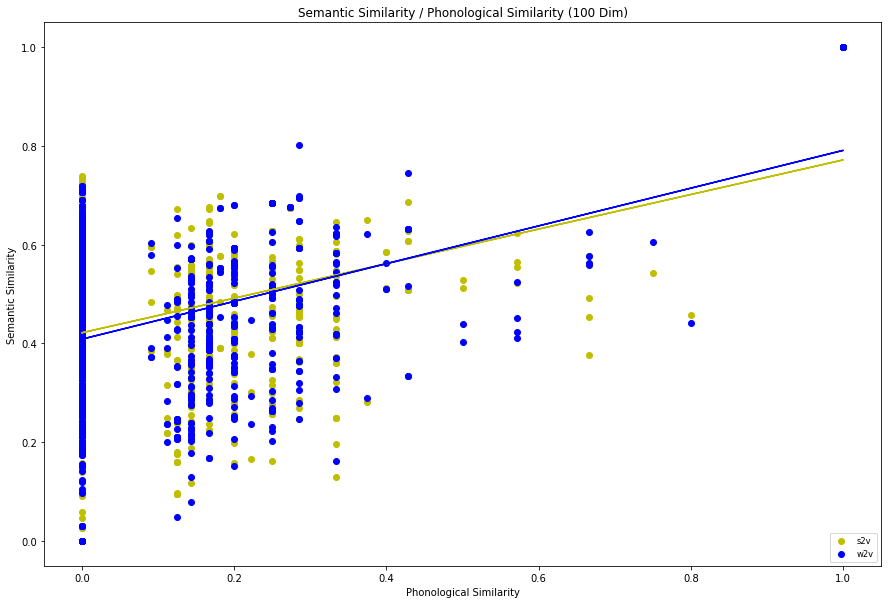

In [103]:
'''100 dimensions'''

s2v = '../forager/output/100_dim_results/only_s2v_results/lexical_results.csv'
w2v = '../forager/output/100_dim_results/only_w2v_results/lexical_results.csv'




s2v = pd.read_csv(s2v)
s2v_semantic = np.array(s2v['Semantic_Similarity'].tolist())
s2v_phonological = np.array(s2v['Phonological_Similarity'].tolist())
s2v_slope, s2v_intercept = np.polyfit(s2v_phonological, s2v_semantic, 1) 
s2v_line = s2v_slope * s2v_phonological + s2v_intercept

w2v = pd.read_csv(w2v)
w2v_semantic = np.array(w2v['Semantic_Similarity'].tolist())
w2v_phonological = np.array(w2v['Phonological_Similarity'].tolist())
w2v_slope, w2v_intercept = np.polyfit(w2v_phonological, w2v_semantic, 1) 
w2v_line = w2v_slope * w2v_phonological + w2v_intercept


plt.figure(figsize=(15, 10))
plt.title("Semantic Similarity / Phonological Similarity (100 Dim)")
plt.scatter(s2v_phonological, s2v_semantic, c='y', label = "s2v")
plt.plot(s2v_phonological, s2v_line, c='y')

plt.scatter(w2v_phonological, w2v_semantic, c='b', label = "w2v")
plt.plot(w2v_phonological, w2v_line, c='b')



plt.legend(loc='lower right', fontsize= 'small')

plt.xlabel('Phonological Similarity')
plt.ylabel('Semantic Similarity')
plt.savefig("../plots/Q4/Semantic-Phon-100")
plt.show()

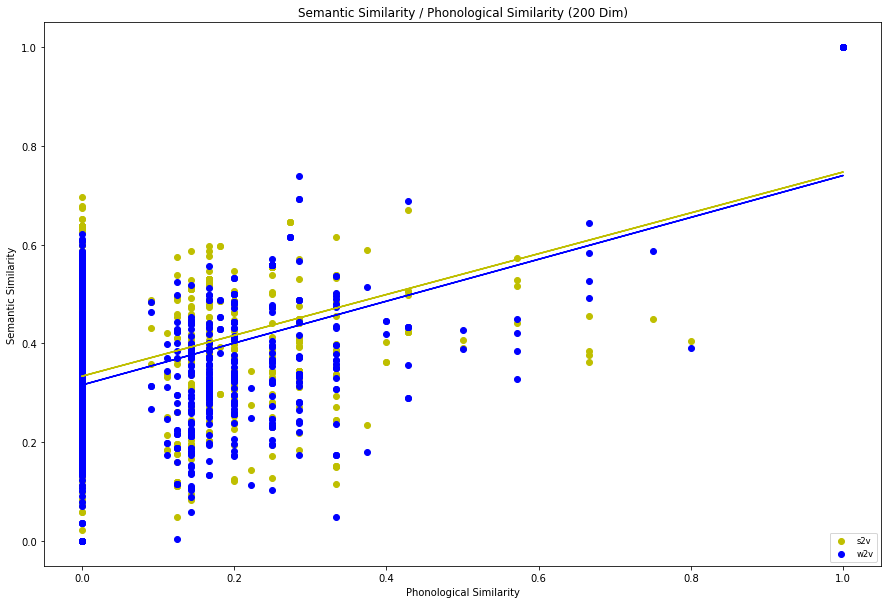

In [104]:
'''200 dimensions'''

s2v = '../forager/output/200_dim_results/only_s2v_results/lexical_results.csv'
w2v = '../forager/output/200_dim_results/only_w2v_results/lexical_results.csv'




s2v = pd.read_csv(s2v)
s2v_semantic = np.array(s2v['Semantic_Similarity'].tolist())
s2v_phonological = np.array(s2v['Phonological_Similarity'].tolist())
s2v_slope, s2v_intercept = np.polyfit(s2v_phonological, s2v_semantic, 1) 
s2v_line = s2v_slope * s2v_phonological + s2v_intercept

w2v = pd.read_csv(w2v)
w2v_semantic = np.array(w2v['Semantic_Similarity'].tolist())
w2v_phonological = np.array(w2v['Phonological_Similarity'].tolist())
w2v_slope, w2v_intercept = np.polyfit(w2v_phonological, w2v_semantic, 1) 
w2v_line = w2v_slope * w2v_phonological + w2v_intercept


plt.figure(figsize=(15, 10))
plt.title("Semantic Similarity / Phonological Similarity (200 Dim)")
plt.scatter(s2v_phonological, s2v_semantic, c='y', label = "s2v")
plt.plot(s2v_phonological, s2v_line, c='y')

plt.scatter(w2v_phonological, w2v_semantic, c='b', label = "w2v")
plt.plot(w2v_phonological, w2v_line, c='b')



plt.legend(loc='lower right', fontsize= 'small')

plt.xlabel('Phonological Similarity')
plt.ylabel('Semantic Similarity')
plt.savefig("../plots/Q4/Semantic-Phon-200")

plt.show()

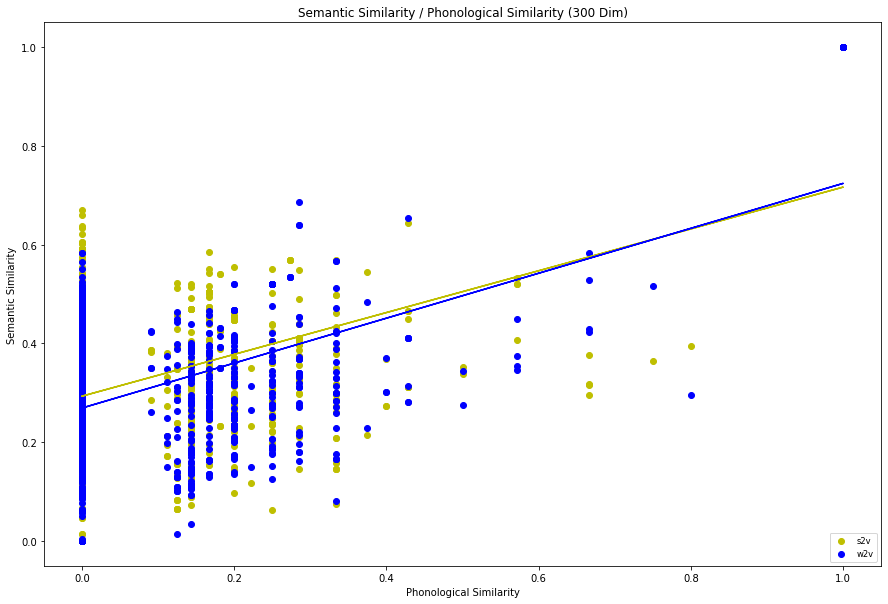

In [105]:
'''300 dimensions'''

s2v = '../forager/output/300_dim_results/only_s2v_results/lexical_results.csv'
w2v = '../forager/output/300_dim_results/only_w2v_results/lexical_results.csv'



s2v = pd.read_csv(s2v)
s2v_semantic = np.array(s2v['Semantic_Similarity'].tolist())
s2v_phonological = np.array(s2v['Phonological_Similarity'].tolist())
s2v_slope, s2v_intercept = np.polyfit(s2v_phonological, s2v_semantic, 1) 
s2v_line = s2v_slope * s2v_phonological + s2v_intercept

w2v = pd.read_csv(w2v)
w2v_semantic = np.array(w2v['Semantic_Similarity'].tolist())
w2v_phonological = np.array(w2v['Phonological_Similarity'].tolist())
w2v_slope, w2v_intercept = np.polyfit(w2v_phonological, w2v_semantic, 1) 
w2v_line = w2v_slope * w2v_phonological + w2v_intercept


plt.figure(figsize=(15, 10))
plt.title("Semantic Similarity / Phonological Similarity (300 Dim)")
plt.scatter(s2v_phonological, s2v_semantic, c='y', label = "s2v")
plt.plot(s2v_phonological, s2v_line, c='y')

plt.scatter(w2v_phonological, w2v_semantic, c='b', label = "w2v")
plt.plot(w2v_phonological, w2v_line, c='b')



plt.legend(loc='lower right', fontsize= 'small')

plt.xlabel('Phonological Similarity')
plt.ylabel('Semantic Similarity')
plt.savefig("../plots/Q4/Semantic-Phon-300")

plt.show()

In [ ]:
# get correlation for each dimensions 